# Learn Jupyter Notebook
Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations, and narrative text. It is widely used in data science, machine learning, and scientific computing.

# Key Features
- **Interactive Code Execution**: Write and execute code in real-time.
- **Rich Text Support**: Combine code with formatted text, images, and links.

In [6]:
# Numerical and array tools
import numpy as np

# Data manipulation
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# Replace with your own path
df = pd.read_csv("../data/Monday-WorkingHours.pcap_ISCX.csv")

# View the shape and some rows
print("Shape:", df.shape)
df.head()

Shape: (529918, 85)


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-8.254.250.126-49188-80-6,8.254.250.126,80,192.168.10.5,49188,6,03/07/2017 08:55:58,4,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,192.168.10.5-8.254.250.126-49188-80-6,8.254.250.126,80,192.168.10.5,49188,6,03/07/2017 08:55:58,1,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,192.168.10.5-8.254.250.126-49188-80-6,8.254.250.126,80,192.168.10.5,49188,6,03/07/2017 08:55:58,1,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,192.168.10.5-8.254.250.126-49188-80-6,8.254.250.126,80,192.168.10.5,49188,6,03/07/2017 08:55:58,1,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,192.168.10.14-8.253.185.121-49486-80-6,8.253.185.121,80,192.168.10.14,49486,6,03/07/2017 08:56:22,3,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [8]:
# Check for missing data
print(df.isnull().sum())

# Optional: drop columns with many missing values or irrelevant info
df = df.drop(columns=['Flow ID', 'Source IP', 'Destination IP'])  # Example

# Convert all numeric columns to float if needed
df = df.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
df = df.dropna()


Flow ID             0
Source IP           0
Source Port         0
Destination IP      0
Destination Port    0
                   ..
Idle Mean           0
Idle Std            0
Idle Max            0
Idle Min            0
Label               0
Length: 85, dtype: int64


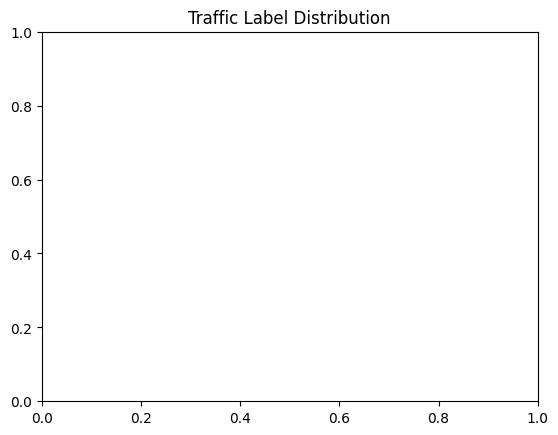

c:\Users\Akmal\Development\Python\Python313\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\Akmal\Development\Python\Python313\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


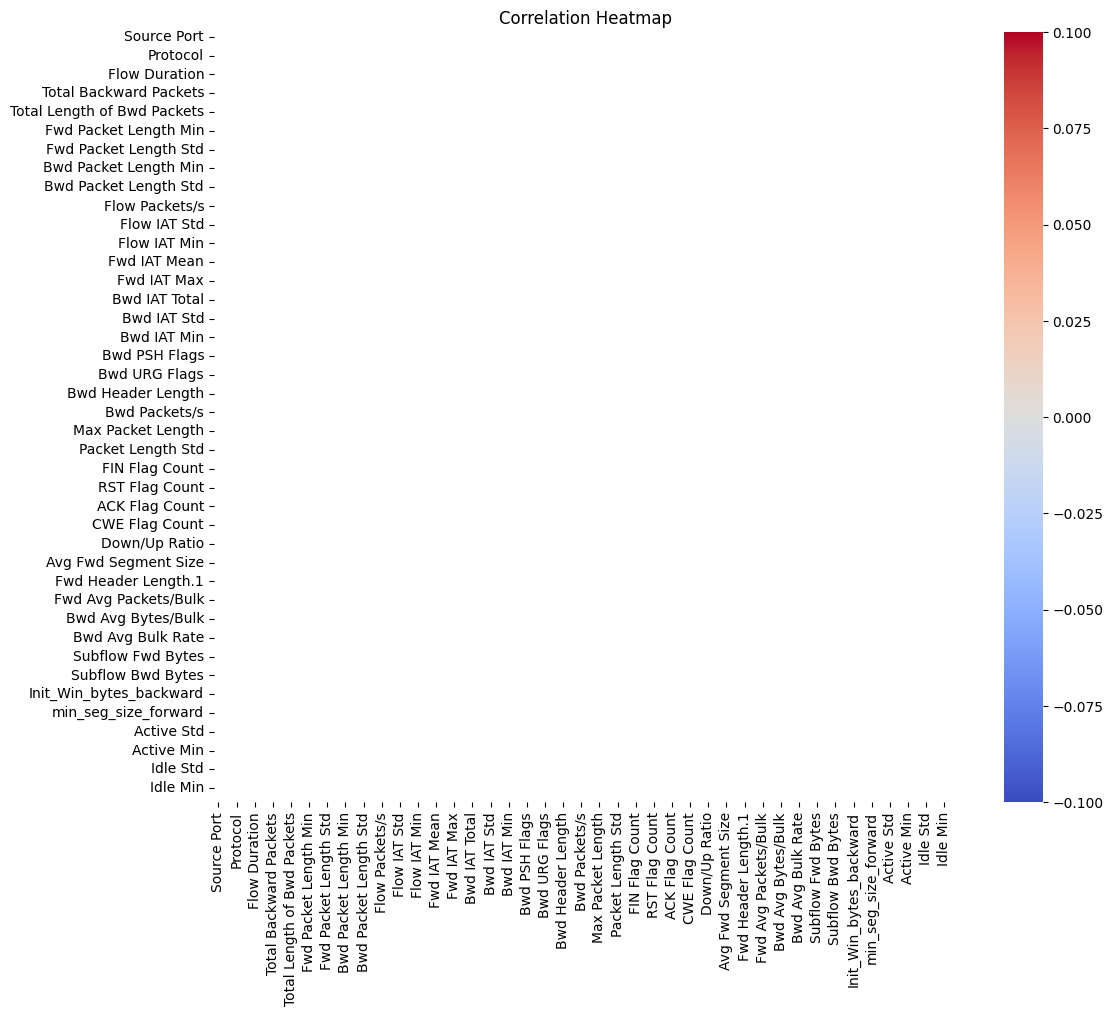

In [9]:
# Plot label distribution
sns.countplot(x='Label', data=df)
plt.title("Traffic Label Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [10]:
# Extract features (X) and labels (y)
X = df.drop(columns=['Label'])
y = df['Label']

# Encode labels to 0/1 if needed
y = (y != 'BENIGN').astype(int)  # Attack = 1, Normal = 0